# Regressão Linear Polinomial

Para problemas não-linearmente separáveis

````
Capítulo 7 (Polynomial Regression Models) do livro Introduction to Linear Regression Analysis de G. Geoffrey Vining, Elizabeth A. Peck e Douglas C. Montgomery: mostra bastante sobre a teoria da regressão polinomial
````

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = "../../files/"

## Comparando Polinomiale Simples em `plano_saude2.csv`

In [32]:
base = pd.read_csv(file_path + 'plano_saude2.csv')
base.head()

,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150


In [33]:
X = base.iloc[:, 0:1].values
y = base.iloc[:, 1].values

### Regressão Simples

In [34]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X, y)

array([2463.18787879])

In [35]:
print("Score da Linear:", regressor1.score(X, y))

Score da Linear: 0.6722701203412687


In [36]:
# Predizer o Custo para uma pessoa de 40 anos
regressor1.predict(np.array(40).reshape(1, -1)) # R$ 2.463,00

array([2463.18787879])

Text(0, 0.5, 'Custo')

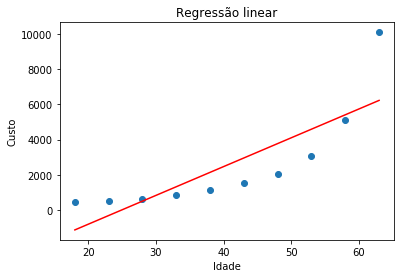

In [9]:
# Plotando gráfico da Regressão Linear
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, regressor1.predict(X), color = 'red')
plt.title('Regressão linear')
plt.xlabel('Idade')
plt.ylabel('Custo')

### Regressão Polinomial

A regressão Polinomail será 

**GERAR MAIS FEATURES POLINOMIAIS** para isso usamos `PolynomialFeatures`

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4) # Elevar até a 4
X_poly = poly.fit_transform(X)
X_poly[0] 
# Perceba que agora tem x^0 , x^1, x^2, x^3, x^4
# x^0 :: constante, depdendneo da lib usada, ode ser útil, entâo deixamos

array([1.00000e+00, 1.80000e+01, 3.24000e+02, 5.83200e+03, 1.04976e+05])

Com mais features polinomiais, aplicamos **O MESMO LinearRegression**

In [39]:
regressor2 = LinearRegression()
regressor2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print("Score da Polinomial:", regressor2.score(X_poly, y))

Score da Polinomial: 0.997649414732199


In [45]:
# Exemplo da criação de features
valor_40 = np.array(40).reshape(1, -1)
print(valor_40)
example_poly = poly.fit_transform(np.array(40).reshape(1, -1))
print("Valor 40 tranformado em x^0, x^1, x^2, x^3\n", example_poly)

[[40]]
Valor 40 tranformado em x^0, x^1, x^2, x^3
 [[1.00e+00 4.00e+01 1.60e+03 6.40e+04 2.56e+06]]


In [ ]:
# Predizer o Custo para uma pessoa de 40 anos
regressor2.predict(poly.transform(np.array(40).reshape(1, -1)))

Text(0, 0.5, 'Custo')

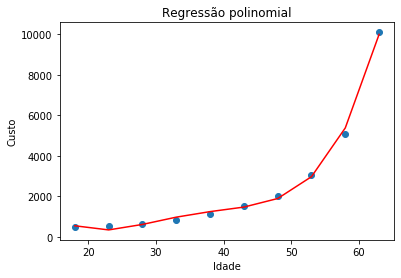

In [14]:
plt.scatter(X, y)
plt.plot(X, regressor2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Regressão polinomial')
plt.xlabel('Idade')
plt.ylabel('Custo')

## Regresão Polinomial `house_price`

In [18]:
base = pd.read_csv(file_path + 'house-prices.csv')

X = base.iloc[:, 3:19].values
y = base.iloc[:, 2].values

from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    X, y, test_size = 0.3, random_state = 0)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_treinamento_poly = poly.fit_transform(X_treinamento)
X_teste_poly = poly.transform(X_teste)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento_poly, y_treinamento)
previsoes = regressor.predict(X_teste_poly)
score = regressor.score(X_treinamento_poly, y_treinamento)
score

0.817934723341486

In [21]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_teste, previsoes)

## Polinomyal Line Regression English ML-AZ

In [22]:
# Importing the dataset
dataset = pd.read_csv(file_path + 'Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)"""


'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)'

In [23]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

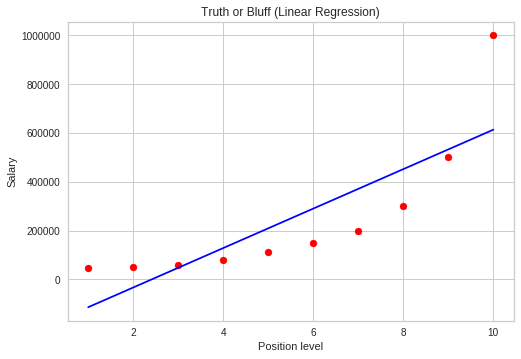

In [24]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

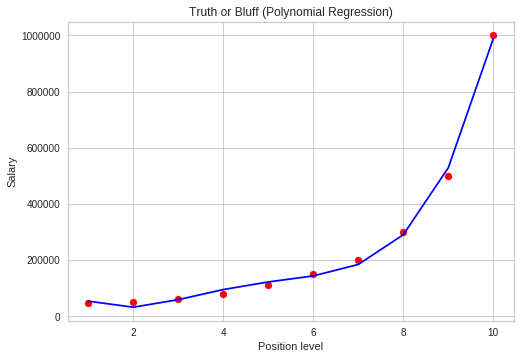

In [25]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

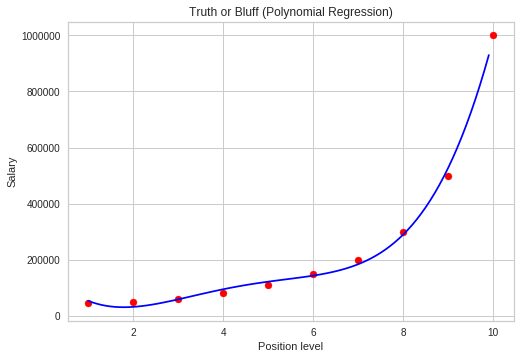

In [26]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [28]:
# Predicting a new result with Linear Regression
lin_reg.predict([[6.5]])

array([330378.78787879])

In [29]:
# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.4526516])

## Questions  Polynomial Regression English ML-AZ

### Polynomial Regression Intuition

Is Polynomial Regression a linear or non linear model?

That depends on what you are referring to. Polynomial Regression is linear on the coefficients since we don’t
have any power of the coefficients (all the coefficients are raised to the power of 1: b 0 , b 1 , ..., b n ). However, Polynomial Regression is a non linear function of the input x, since we have the inputs raised to several
powers: x (power 1), x 2 (power 2), ..., x n (power n). That is how we can also see the Polynomial Regression
as a non linear model. Besides indeed, Polynomial Regression is appropriate when the data is non linearly
distributed (meaning you can’t fit a straight line between y and x).

### Polynomial Regression in Python

Why didn’t we apply Feature Scaling in our Polynomial Regression model?

It’s simply because, since y is a linear combination of x and x 2 , the coefficients can adapt their scale to put
everything on the same scale. For example if y takes values between 0 and 1, x takes values between 1 and
10 and x 2 takes values between 1 and 100, then b 1 can be multiplied by 0.1 and b 2 can be multiplied by 0.01
so that y, b 1 x 1 and b 2 x 2 are all on the same scale.

How do we find the best degree?

The main form of finding a good fit is to plot the model and see what it looks like visually. You simply
test several degrees and you see which one gives you the best fit. The other option is to find the lowest
root-mean-square error (RMSE) for your model, but in that case be careful not to overfit the data.

Why did we have to create a second linear regressor ’lin_reg_2’ ? Could we not have used
’lin_reg’ directly?

No, because ’lin_reg’ is already fitted to X and y and now we want to fit a new linear model to X p oly and
y. So we have to create a new regressor object. One must important that the fit method here finds the
coefficient between the independent variables and the dependent variable. Therefore since ’lin_reg’ already
got the coefficients of correlation between X and y, ’lin_reg_2’ has to be created to get some new coefficients
of correlations between X p oly and y.